# A stylized FTT model. Specified in Latex 

## A Future Technology Transformations (FTT) model 
Future Technology Transformations (FTT) is a framework for technology diffusion model based on simulation rather than optimization approach that is more commonly used. The FTT framework currently exists for power, road transport, steel and heating sectors 

Original paper:  [Mercure, J.-F. et al. The dynamics of technology diffusion and the impacts of climate policy instruments in the decarbonisation of the global electricity sector. Energy Policy 73, 686–700.](https://www.sciencedirect.com/science/article/pii/S0301421514004017)

The model below is a very simple version. The purpose is to show some of the properties and how to set up an model in Latex  

## Modelflow
For more information on modelflow please look [here](https://ibhansen.github.io/mfbook/content/introduction.html)  

## Why specify a model in Latex? 

Sometime the **implementation** of a model in software don't match the **specification** of the model in 
the text in which the model is presented. It can be a challenge to make sure that the specification is 
updated in order to reflect changes made in the implementation. 

By extracting the model from a Latex script which describes and specify the model, one can always be sure that simulations reflect the model as described in the paper. 

Also the author is forced to make a complete specification of the model, else it won't run. 

## Import libraries 

```{note}
This notebook will not render nice in Colab 

Because of limitations in Jupyterbook - which is used for creating this book - the latex input is input twice. That is not nessecary for use in an notebook. 
```

In [25]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

In [26]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from IPython.core.display import HTML,Markdown,Latex


from modelclass import model
import modeljupytermagic

# some useful stuf
model.widescreen()
pd.set_option('display.max_rows', None, 'display.max_columns', 10, 'display.precision', 4)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Write a latex script  
The model consists of the equations and the lists   

The jupyter magic command **%%latexflow** will extract the model. then it will  transform the equations to **ModelFlow** equations and finaly it will create a modelflow **model** instance.   

In the following cell the modelinstance wil be called **mftt**. It will be able to solve the model. 

In [27]:
%%latexflow mftt  

A very simple FTT model. 

Two lists of technology  are defined: 
    
List $i =\{t1, t2, t3\}$

List $j = \{t1, t2, t3\}$



\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (\underbrace{F^{i,j}}_{Preferences}/\underbrace{\tau^{j}}_{Life expectancy}
                             - F^{j,i}/\tau^{i}))
\end{equation}


\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(C^{i}-C^{j})}{\sigma^{i,j}} )}
\end{equation}

\begin{equation}
\label{eq:sigma}
\sigma^{i,j} = \sqrt{\sigma^{i}**2 \times \sigma^{j}**2}
\end{equation}



\begin{equation}
\label{eq:UD}
UsefulDemand^{i} = Share^{i} \times UsefulDemand\_total 
\end{equation}

\begin{equation}
\label{eq:UD_total}
UsefulDemand\_total  = UsefulDemand\_total_{t-1} \times 
(1+\frac{UsefulDemand\_total\_growth}{100})
\end{equation}

To check, that the shares add up to one. 

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share\_{i})
\end{equation}


## the %%latexflow cell will extract the equations from the script 
and create a modelinstance which is named: **mftt**

## This text will render like this


In [28]:
display(Markdown(mftt.equations_latex))


A very simple FTT model. 

Two lists of technology  are defined: 
    
List $i =\{t1, t2, t3\}$

List $j = \{t1, t2, t3\}$



\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (\underbrace{F^{i,j}}_{Preferences}/\underbrace{\tau^{j}}_{Life expectancy}
                             - F^{j,i}/\tau^{i}))
\end{equation}


\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(C^{i}-C^{j})}{\sigma^{i,j}} )}
\end{equation}

\begin{equation}
\label{eq:sigma}
\sigma^{i,j} = \sqrt{\sigma^{i}**2 \times \sigma^{j}**2}
\end{equation}



\begin{equation}
\label{eq:UD}
UsefulDemand^{i} = Share^{i} \times UsefulDemand\_total 
\end{equation}

\begin{equation}
\label{eq:UD_total}
UsefulDemand\_total  = UsefulDemand\_total_{t-1} \times 
(1+\frac{UsefulDemand\_total\_growth}{100})
\end{equation}

To check, that the shares add up to one. 

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share\_{i})
\end{equation}


%%latexflow mftt display render

A very simple FTT model. 

Two lists of technology  are defined: 
    
List $i =\{technology1, technology2, technology3\}$

List $j = \{technology1, technology2, technology3\}$


$$
\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (\underbrace{F^{i,j}}_{Preferences}/\underbrace{\tau^{j}}_{Life expectancy}
                             - F^{j,i}/\tau^{i}))
\end{equation}
$$

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(C^{i}-C^{j})}{\sigma^{i,j}} )}
\end{equation}

\begin{equation}
\label{eq:sigma}
\sigma^{i,j} = \sqrt{\sigma^{i}**2 \times \sigma^{j}**2}
\end{equation}



\begin{equation}
\label{eq:UD}
UsefulDemand^{i} = Share^{i} \times UsefulDemand\_total 
\end{equation}

\begin{equation}
\label{eq:UD_total}
UsefulDemand\_total  = UsefulDemand\_total_{t-1} \times 
(1+\frac{UsefulDemand\_total\_growth}{100})
\end{equation}

To check, that the shares add up to one. 

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share\_{i})
\end{equation}


## The latex script is first transpiled to a  template model

In [29]:
print(mftt.equations_original)

Do i $ 
 Frml SHARES2 diff(Share_{i})  = sum(j,Share_{i}*Share_{j}*(F_{i}_{j}/tau_{j}-F_{j}_{i}/tau_{i})) $ 
enddo $ 
Do i $ Do j $ 
 Frml preferences F_{i}_{j}  = ((1)/(1+exp((((C_{i}-C_{j}))/(sigma_{i}_{j}))))) $ 
enddo $ enddo $ 
Do i $ Do j $ 
 Frml sigma sigma_{i}_{j}  = sqrt(sigma_{i}**2*sigma_{j}**2) $ 
enddo $ enddo $ 
Do i $ 
 Frml UD UsefulDemand_{i}  = Share_{i}*UsefulDemand_total $ 
enddo $ 
Frml UD_total UsefulDemand_total   = UsefulDemand_total(-1)*(1+((UsefulDemand_total_growth)/(100))) $ 
Frml check_shares Share_total   = sum(i,Share_{i}) $ 
LIST I  =  I  : T1  T2  T3$
LIST J  =  J  :  T1  T2  T3$


## Then the template model is expanded to a Business language model

In [30]:
print(mftt.equations)

FRML SHARES2 SHARE_T1=SHARE_T1(-1)+((SHARE_T1*SHARE_T1*(F_T1_T1/TAU_T1-F_T1_T1/TAU_T1)+SHARE_T1*SHARE_T2*(F_T1_T2/TAU_T2-F_T2_T1/TAU_T1)+SHARE_T1*SHARE_T3*(F_T1_T3/TAU_T3-F_T3_T1/TAU_T1)))$
FRML SHARES2 SHARE_T2=SHARE_T2(-1)+((SHARE_T2*SHARE_T1*(F_T2_T1/TAU_T1-F_T1_T2/TAU_T2)+SHARE_T2*SHARE_T2*(F_T2_T2/TAU_T2-F_T2_T2/TAU_T2)+SHARE_T2*SHARE_T3*(F_T2_T3/TAU_T3-F_T3_T2/TAU_T2)))$
FRML SHARES2 SHARE_T3=SHARE_T3(-1)+((SHARE_T3*SHARE_T1*(F_T3_T1/TAU_T1-F_T1_T3/TAU_T3)+SHARE_T3*SHARE_T2*(F_T3_T2/TAU_T2-F_T2_T3/TAU_T3)+SHARE_T3*SHARE_T3*(F_T3_T3/TAU_T3-F_T3_T3/TAU_T3)))$
FRML PREFERENCES F_T1_T1  = ((1)/(1+EXP((((C_T1-C_T1))/(SIGMA_T1_T1))))) $
FRML PREFERENCES F_T1_T2  = ((1)/(1+EXP((((C_T1-C_T2))/(SIGMA_T1_T2))))) $
FRML PREFERENCES F_T1_T3  = ((1)/(1+EXP((((C_T1-C_T3))/(SIGMA_T1_T3))))) $
FRML PREFERENCES F_T2_T1  = ((1)/(1+EXP((((C_T2-C_T1))/(SIGMA_T2_T1))))) $
FRML PREFERENCES F_T2_T2  = ((1)/(1+EXP((((C_T2-C_T2))/(SIGMA_T2_T2))))) $
FRML PREFERENCES F_T2_T3  = ((1)/(1+EXP((((C_T2-C_T3))/

## And we can inspect the structure

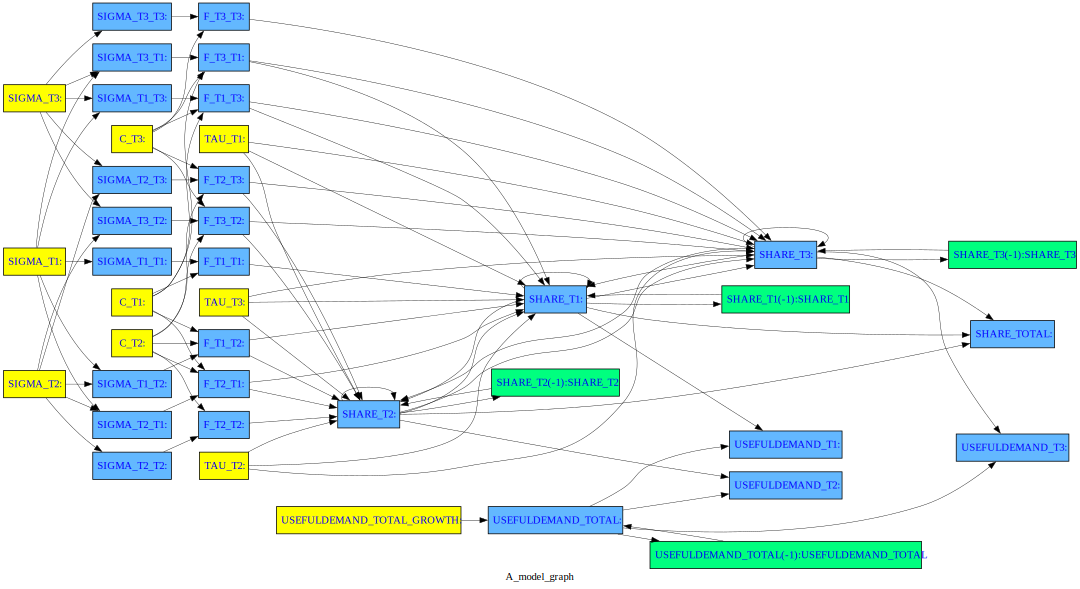

In [31]:
mftt.drawmodel(size=(15,15))

## Create some mock data
The **%%dataframe** magic command helps dooing this. 

 ### Initial values for the shares. 
 Needed, as the lagged values are needed for the simulation to start 

In [32]:
%%dataframe  startvalues  show  periods=1 
     
       SHARE_T1      SHARE_T2    SHARE_T3  USEFULDEMAND_TOTAL 
       0.33333        0.33333     0.33333             100

,SHARE_T1,SHARE_T2,SHARE_T3,USEFULDEMAND_TOTAL
index,,,,
2021,0.3333,0.3333,0.3333,100.0


 ### Parameter values  
 Initial all the tecknologies are equal. 

In [33]:
%%dataframe  exoinit  nshow  periods=100 
C_T1 C_T2 C_T3  TAU_T1 TAU_T2 TAU_T3 USEFULDEMAND_TOTAL_GROWTH SIGMA_T1 SIGMA_T2 SIGMA_T3
4      4  4      3     3      3      2                              2        2       2 

 ### Combine the dataframe to one which can be solves 

In [34]:
baseline = pd.concat([startvalues,exoinit],axis=1).fillna(0)
baseline.head().T

index,2021,2022,2023,2024,2025
SHARE_T1,0.3333,0.0,0.0,0.0,0.0
SHARE_T2,0.3333,0.0,0.0,0.0,0.0
SHARE_T3,0.3333,0.0,0.0,0.0,0.0
USEFULDEMAND_TOTAL,100.0000,0.0,0.0,0.0,0.0
C_T1,4.0000,4.0,4.0,4.0,4.0
C_T2,4.0000,4.0,4.0,4.0,4.0
C_T3,4.0000,4.0,4.0,4.0,4.0
TAU_T1,3.0000,3.0,3.0,3.0,3.0
TAU_T2,3.0000,3.0,3.0,3.0,3.0
TAU_T3,3.0000,3.0,3.0,3.0,3.0


## Solve the model 

In [35]:
res = mftt(baseline,silent=1,first_test=100,init=True)

## Create some scenarios
In this case the cost of technology 2 (t2) is changed 

In [36]:
for change_c_t2 in [0 , -1.0, -0.5, 0.5 , 1]:
    alternative = baseline.upd(f'c_t2 + {change_c_t2}')
    _ = mftt(alternative,keep = f'cost of tecknology 2 changed by {change_c_t2}')

## Create a gouping of variables for the visualizer
The first group will automatic be displayed. 

In [37]:
mftt.group_dict = {
    'share*' : 'Shares',
    '*'      :  'all'
}

In [38]:
mftt.keep_show()